## IRIS Plant classification using Support Vector Machines

### The popular IRIS dataset is used for training of linear and non-linear SVM models. The hyper-parameters are fine-tuned of the models are fine-tuned using K-Fold Cross Validation and GridSearch to improve model performance.

In [1]:
# importing the libraries
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading iris data set
iris = datasets.load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
""" 
separating features and labels
iris_x contains features
iris_y contains labels 
"""
iris_X = iris.data
iris_y = iris.target

In [5]:
print(iris_X.shape)
print(iris_X)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

In [6]:
print(iris_y.shape)
print(iris_y)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# splitting the data set for training and testing parts
indices = np.random.permutation(len(iris_X))

iris_X_train = iris_X[indices[:-20]]
iris_y_train = iris_y[indices[:-20]]
iris_X_test = iris_X[indices[-20:]]
iris_y_test = iris_y[indices[-20:]]

In [8]:
print(iris_X_train.shape)
print(iris_X_test.shape)

(130, 4)
(20, 4)


## Linear SVM¶

In [9]:
# creating folds list with k=5 and k = 10
k_values = [5, 10]

# list to store different fold objects
folds = []

for i in k_values:
    folds.append(KFold(n_splits = i, shuffle = True, random_state = 101))

## Hyper-parameter tuning: Finding the best "C" value

In [10]:
# specify range of C
c = np.arange(0, 100, 0.25)
              
# creating hyper-parameter dictionary
hyper_params = [{'C': c}]

# creating linear SVM model
model = svm.SVC(kernel="linear")
              
models_cv = []

for i in range(2):
    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = model, param_grid = hyper_params, scoring= 'accuracy', cv = folds[i], verbose = 1,
                                                                                    return_train_score=True, n_jobs = -1)
    models_cv.append(model_cv)
    models_cv[i].fit(iris_X_train, iris_y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The sc

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.96923077 0.97692308 0.96923077 0.97692308 0.97692308
 0.96923077 0.96923077 0.97692308 0.96923077 0.96923077 0.96153846
 0.96153846 0.96923077 0.96923077 0.96923077 0.96923077 0.96923077
 0.96923077 0.96923077 0.96923077 0.96923077 0.96923077 0.96923077
 0.96923077 0.96923077 0.96923077 0.96153846 0.96153846 0.96153846
 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846
 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846
 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846
 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846
 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846
 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846
 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846
 0.96153846 0.96153846 0.96153846 0.96153846 0.96153846 0

In [11]:

# list to store cross validation results
cv_results = []

for i in range(len(k_values)):
    cv_r = pd.DataFrame(models_cv[i].cv_results_)
    cv_results.append(cv_r)

In [12]:
# function to plot cross-validation scores (accuracies based on different "C" values)
def plot_scores(cv_results, k_value):
    plt.figure(figsize=(10, 8))
    
    # plotting data
    plt.plot(c, cv_results["mean_test_score"])
    plt.plot(c, cv_results["mean_train_score"])
    
    # setting up labels
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    str_title = "k = " + str(k_value)
    plt.title(str_title)
    
    # setting x and y axis range
    plt.yticks(np.arange(0, 1.1, 0.10))
    plt.xticks(np.arange(0, 101, 5))
    
    # plot legend
    plt.legend(['test accuracy', 'train accuracy'], loc='best')

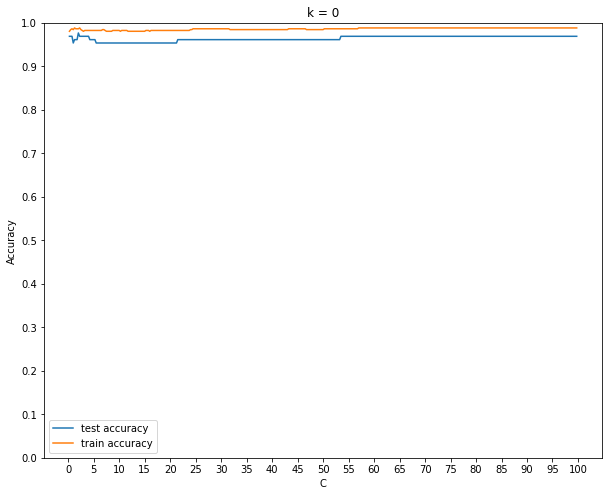

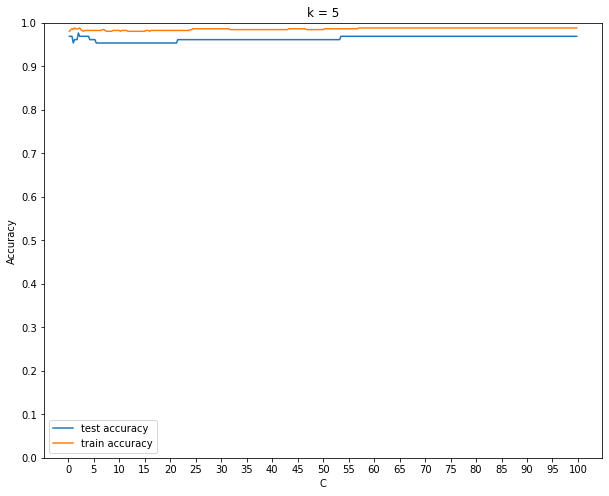

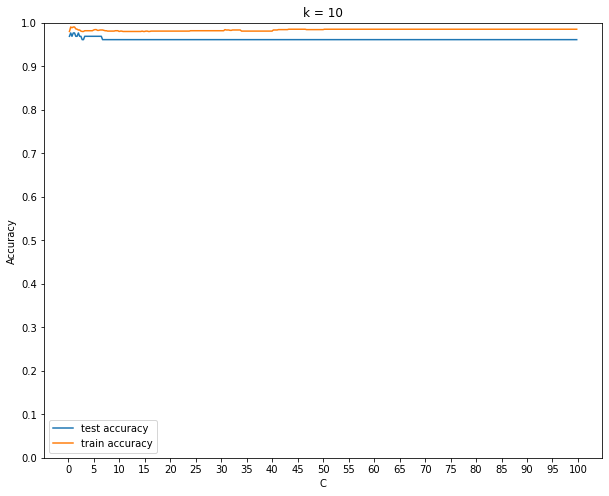

In [14]:
plot_scores(cv_results[0], 5)
plot_scores(cv_results[1], 10)

In [15]:
# prints the best parameter values found after k-fold cross-validation
def best_params(models_cv, k_values):
    
    for i in range(len(k_values)):
        best_score = models_cv[i].best_score_
        best_hyperparams = models_cv[i].best_params_
        print("The best mean test score is {0} corresponding to hyperparameters {1} with k = {2}".format(best_score, best_hyperparams, k_values[i]))

In [16]:
best_params(models_cv, k_values)

The best mean test score is 0.976923076923077 corresponding to hyperparameters {'C': 2.0} with k = 5
The best mean test score is 0.976923076923077 corresponding to hyperparameters {'C': 0.5} with k = 10


## Training the classifier using the best 'C' value and then testing on unseen data
### Using k=5 for k-Fold Cross Validation

In [17]:
best_hyperparams = models_cv[0].best_params_

print("The best C value: ", best_hyperparams['C'])

# creating a linear SVM classifier
svc = svm.SVC(kernel= "linear", C = best_hyperparams['C'])

# perform the training
svc.fit(iris_X_train, iris_y_train)

# prediction
y_pred = svc.predict(iris_X_test)

# accuracy
print("Accuracy:", metrics.accuracy_score(y_true=iris_y_test, y_pred=y_pred), "\n")

# printing the confusion matrix
c_matrix = metrics.confusion_matrix(iris_y_test, y_pred)
print(c_matrix)

The best C value:  2.0
Accuracy: 0.95 

[[6 0 0]
 [0 9 1]
 [0 0 4]]


In [18]:
print("Evaluating on test data: ")
print(metrics.classification_report(iris_y_test, y_pred))

Evaluating on test data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.90      0.95        10
           2       0.80      1.00      0.89         4

    accuracy                           0.95        20
   macro avg       0.93      0.97      0.95        20
weighted avg       0.96      0.95      0.95        20



## k=10 for k-Fold Cross Validation

In [19]:
best_hyperparams = models_cv[1].best_params_

print("The best C value: ", best_hyperparams['C'])

# creating a linear SVM classifier
svc = svm.SVC(kernel= "linear", C = best_hyperparams['C'])

# perform the training
svc.fit(iris_X_train, iris_y_train)

# prediction
y_pred = svc.predict(iris_X_test)

# accuracy
print("Accuracy:", metrics.accuracy_score(y_true=iris_y_test, y_pred=y_pred), "\n")

# printing the confusion matrix
c_matrix = metrics.confusion_matrix(iris_y_test, y_pred)
print(c_matrix)

The best C value:  0.5
Accuracy: 1.0 

[[ 6  0  0]
 [ 0 10  0]
 [ 0  0  4]]


In [20]:
print("Evaluating on test data: ")
print(metrics.classification_report(iris_y_test, y_pred))

Evaluating on test data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [21]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [22]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [23]:
# drop the last two features for plotting

iris_X_train = iris_X_train[:,:2]
iris_X_test = iris_X_test[:,:2]

In [24]:
# plotting decision boundary using gamma, C
def plot_db(C, fig_size):
    svc = svm.SVC(kernel="linear", C=C)
    pred = svc.fit(iris_X_train, iris_y_train)
    U, V = iris_X_train[:, 0], iris_X_train[:, 1]
    xx, yy = make_meshgrid(U, V)
    figsize = fig_size
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    title = "C= " + str(C)
    ax.set_title(title)

    plt.show()

In [ ]:
plot_db(0.5, 8)